In [72]:
import seaborn as sns
import pandas as pd
from pathlib import Path

In [75]:
dataset = 'HEAD-NECK-RADIOMICS-HN1'
datasource = 'TCIA'
signature = 'aerts_original'

bootstrap_feature_path = Path("../../../data/results", f"{datasource}_{dataset}" , "prediction" , signature , "bootstrap_1000")

file_suffix = "_features_c_idx.csv"
bootstrap_df = pd.DataFrame()
for feature_file in sorted(bootstrap_feature_path.rglob(pattern = f"*{file_suffix}")):
    image_type = str(feature_file.name).removesuffix(file_suffix)
    feature_df = pd.read_csv(feature_file, index_col=0)

    bootstrap_df[image_type] = feature_df['C-index']


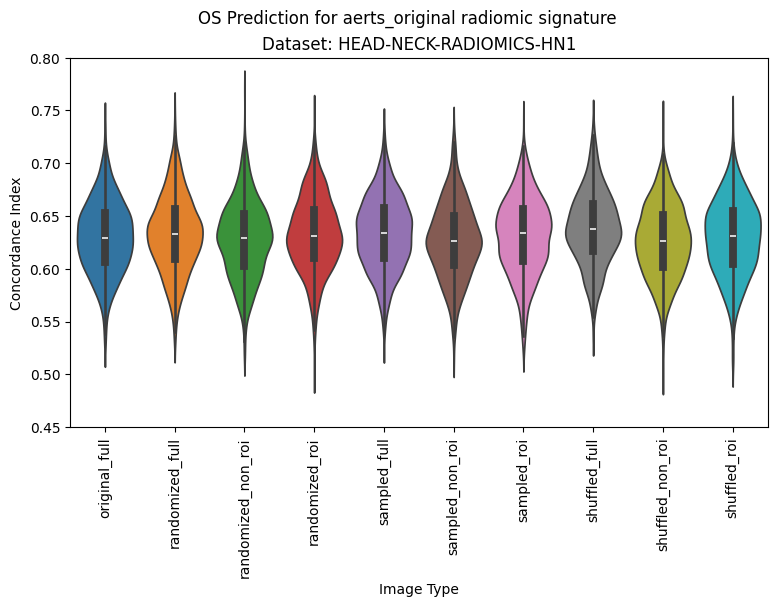

In [76]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.set_figwidth(9)
plt.xticks(rotation=90)
plt.suptitle(f"OS Prediction for {signature} radiomic signature")
ax = sns.violinplot(bootstrap_df)
ax.set_xlabel("Image Type")
ax.set_ylabel("Concordance Index")
ax.set_title(f"Dataset: {dataset}")
ax.set_ybound(lower = 0.45, upper = 0.8)